# Firts look and data description

In [1]:
# Import modules and print general info

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

students = pd.read_csv('stud_math.xls')

pd.set_option('display.max_rows', students.shape[0]+1)

print(students.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [2]:
students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [3]:
# No need to show all rows in the future
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

Dataset contains some empty values and should be also checked for outliers, possible mistakes, discrepancies etc. Let's create functions to apply them in the future.

In [4]:
"""This function will be applied to take a first look on each column. There will be values count for objected columns
and histogram for other"""


def first_look(x):
    for col in x:
        if x[col].dtypes == 'object':
            print(x[col].value_counts())
        else:
            x[col].hist()
            print(f'Histogram for {col} column')
            plt.show()
            
            
"""The following function will replace NaN values within a column"""


def replace_empties(x):
    if pd.isnull(x):
        return None
    else:
        return x
    
    
"""The function will determine outliers for numerical variables and visulize it by creating boxplots"""


def outliers_detector(column):
    sns.boxplot(x=column, data=students)
    plt.show()
    
    
"""The function below will be used for outliers removing"""


def remove_outliers(column):
    Q1 = students[column].quantile(0.25)
    Q3 = students[column].quantile(0.75)
    IQR = Q3 - Q1

    students[column] = students[column].apply(lambda x: x if Q1 - IQR * 1.5 < x < Q3 + IQR * 1.5 else None)
    

"""Student's test (t-test) function"""


def t_test(column, rows):
    cols = students.loc[:, column].value_counts().index[:rows]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue <= 0.05 / len(combinations_all):
            print(f'Variable {column} is significant')
        else:
            print(f'Variable {column} is NOT significant')
        break

            
"""Correlation function"""


def correlation(columns, method):
    test_frame = students.loc[:, columns]
    print(test_frame.astype(float).corr(method=method))

GP    349
MS     46
Name: school, dtype: int64
F    208
M    187
Name: sex, dtype: int64
Histogram for age column


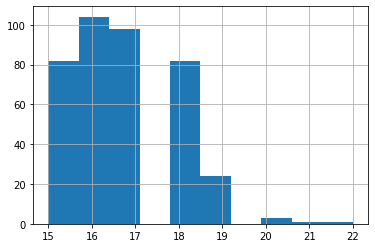

U    295
R     83
Name: address, dtype: int64
GT3    261
LE3    107
Name: famsize, dtype: int64
T    314
A     36
Name: Pstatus, dtype: int64
Histogram for Medu column


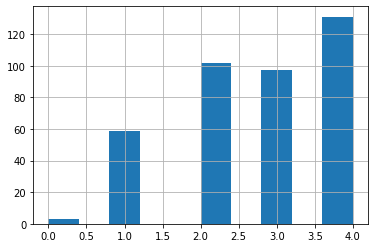

Histogram for Fedu column


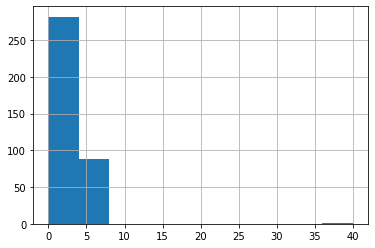

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64
other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64
course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64
mother    250
father     86
other      28
Name: guardian, dtype: int64
Histogram for traveltime column


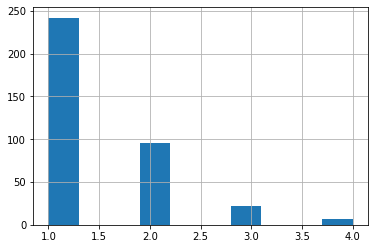

Histogram for studytime column


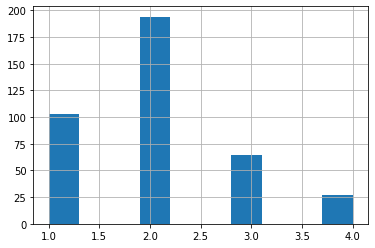

Histogram for failures column


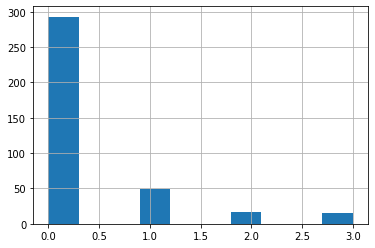

no     335
yes     51
Name: schoolsup, dtype: int64
yes    219
no     137
Name: famsup, dtype: int64
no     200
yes    155
Name: paid, dtype: int64
yes    195
no     186
Name: activities, dtype: int64
yes    300
no      79
Name: nursery, dtype: int64
Histogram for studytime, granular column


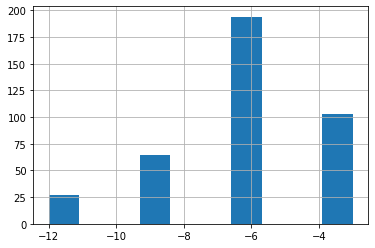

yes    356
no      19
Name: higher, dtype: int64
yes    305
no      56
Name: internet, dtype: int64
no     240
yes    124
Name: romantic, dtype: int64
Histogram for famrel column


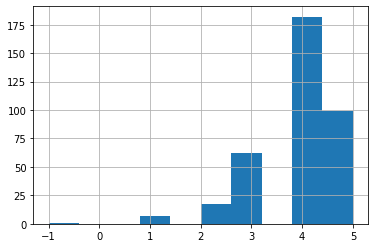

Histogram for freetime column


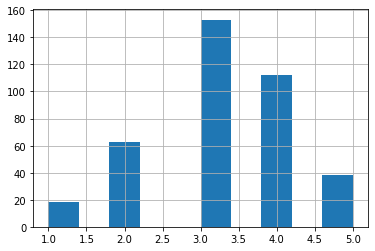

Histogram for goout column


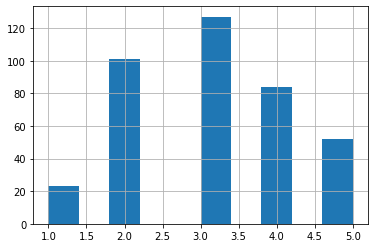

Histogram for health column


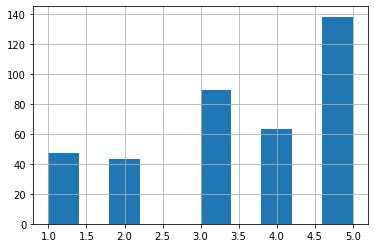

Histogram for absences column


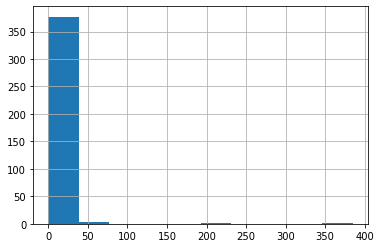

Histogram for score column


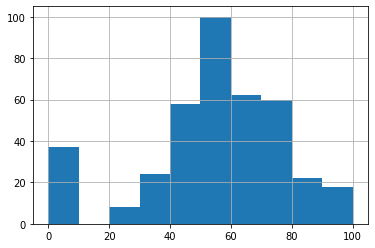

In [5]:
# Get list of columns names
columns = []
for i in students.columns:
    columns.append(i)

# Apply replace_empties function
for i in columns:
    students[i] = students[i].apply(replace_empties)

# Apply firts_look function
first_look(students)

Mistakes in dataset:
Father education (Fedu) column contains some wrong values (cannot be higher than 4).
Family relations (famrel) has negative values wich should be removed.
Score has some empties, we can remove entire rows with them as "score" is key variable for the model.
Column studytime,granular shouldn't be presented in the model according to initial task
coditions.


Descriptive analysis:
Most students (~88%) are from GP school living in urban area and have big families (more than 3 members). The age is distributed evenly between 15 and 18 years and has some exceptions out of the range. Most of them are beign grew up in full families and their parents live together. Both students' mothers and fathers primarily have higher education and work in services. The main reason to choose a school is quality of courses, the distance to home and reputation. Most students spend less than 15 min to get to school and 2-5 hours/week for study. They also get support from school and family, but only half of them attend additional activities out of school. The majority wants to obtain higher educan and uses internet. Students mostly have good relationships in famililies and moderately satisfy with freetime.
The majority had less than 50 abcences and got math exam score between 40 and 60.

# Data correction

In [6]:
# NaN values were not replaced in numerical columns we will do it later
pd.set_option('display.max_rows', students.shape[0]+1)
students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,-6.0,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,None,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,None,None,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [7]:
# Let's remove wrong values in Fedu
students['Fedu'] = students['Fedu'].apply(lambda x: None if x > 4 else x)
print(students['Fedu'].value_counts())

2.0    106
3.0     96
4.0     88
1.0     78
0.0      2
Name: Fedu, dtype: int64


In [8]:
# And negative value in famrel (family rlations)
students['famrel'] = students['famrel'].apply(lambda x: None if x < 0 else x)
print(students['famrel'].value_counts())

4.0    182
5.0     99
3.0     62
2.0     17
1.0      7
Name: famrel, dtype: int64


In [9]:
# Delete 'studytime, granular' columns
students = students.drop(columns='studytime, granular')
# students.info()

In [10]:
# Separate numerical columns
num_columns = []
for col in students:
    if students[col].dtypes != 'object':
        num_columns.append(col)
        
num_columns    

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences',
 'score']

In [11]:
# Now we can manually remove columns with discrete value (Medu, Fedu etc.) for correct outliers analysis.
num_columns = ['age', 'absences', 'score']

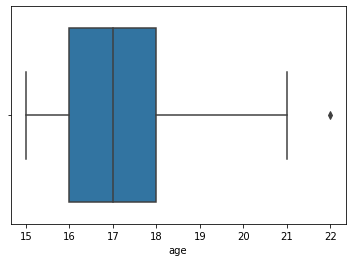

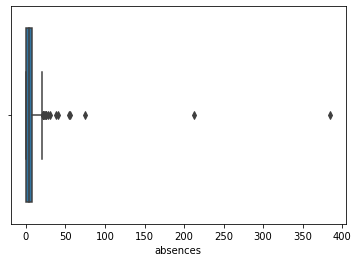

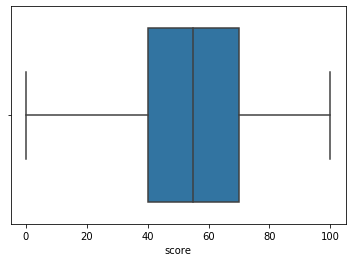

In [12]:
for i in num_columns:
    outliers_detector(i)

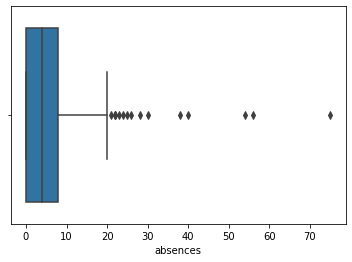

In [13]:
# There are some outliers in age and absences.
# Abcences has 2 extremely high outliers which weight the mean up. 
# So, it's better to remove them first and check for outliers again
students['absences'] = students['absences'].apply(lambda x: None if x > 150 else x)
outliers_detector('absences')

In [14]:
# Now remove outliers using IQR method for 'absences'
remove_outliers('absences')
# students['absences']

In [15]:
# And for 'age'
remove_outliers('age')
# students['age']

In [16]:
# Replace NaN values left in some columns with NoneType using notnull function
students = students.where(pd.notnull(students), None)
students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,None,no,4,3,4,3,6,30
1,GP,F,17,U,GT3,None,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,3,4,30
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,None,no,yes,yes,yes,None,4,3,2,3,10,50
3,GP,F,15,U,GT3,T,4,2,health,None,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,5,2,75
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,5,4,50
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,5,10,75
6,GP,M,16,None,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,3,0,55
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,6,30
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,None,2,2,1,0,95
9,GP,M,15,U,None,None,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,5,0,75


In [17]:
# And drop rows where score is None
students = students.dropna(subset=['score'])
print(students.score.value_counts())

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
60.0     31
40.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64


# Correlation analysis and t-test 

In [18]:
# Run Pearson correlation for quantitative variables
correlation(num_columns, 'pearson')

               age  absences     score
age       1.000000  0.112872 -0.149173
absences  0.112872  1.000000  0.077317
score    -0.149173  0.077317  1.000000


Based on results above score has very low correlation with number of absences, there is a significant chance that absences will not be taken into accoint in the future model. Score and age has slightly negative correlation which may be result of negative age effect: the older a student the more likely he/she had some problems in the past and not able to keep up with the program.

In [19]:
# Run Spearman correlation for rank variables
rank_columns = ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures','famrel', 'freetime', 'goout', 'health']
correlation(rank_columns, 'spearman')

                Medu      Fedu  traveltime  studytime  failures    famrel  \
Medu        1.000000  0.634484   -0.137293   0.083019 -0.243062  0.007164   
Fedu        0.634484  1.000000   -0.126077   0.041863 -0.254474 -0.015209   
traveltime -0.137293 -0.126077    1.000000  -0.111084  0.046164 -0.053431   
studytime   0.083019  0.041863   -0.111084   1.000000 -0.169485  0.055302   
failures   -0.243062 -0.254474    0.046164  -0.169485  1.000000 -0.000779   
famrel      0.007164 -0.015209   -0.053431   0.055302 -0.000779  1.000000   
freetime    0.040273 -0.013581   -0.037963  -0.113063  0.090146  0.153000   
goout       0.074822  0.064979    0.006923  -0.055632  0.094999  0.061058   
health     -0.039552  0.018268   -0.035218  -0.094222  0.109948  0.083072   

            freetime     goout    health  
Medu        0.040273  0.074822 -0.039552  
Fedu       -0.013581  0.064979  0.018268  
traveltime -0.037963  0.006923 -0.035218  
studytime  -0.113063 -0.055632 -0.094222  
failures    0.

Let's take a look on variables with correlation higher than 0.1. The most correlated pair (0.63) is father's and mother's educations, it simply follows common sence: relationships are more likely within the similar social groups. Parent's education can also influence on number of failures (-.24 and -.25 coefficients respectively, negative sign - positive effect). Studytime has also good effect on failures (coeff -.17) and, logically, negative on travel- and freetime. Freetime has moderate positive correlation with family relations level (0.15) and time spending with friends (goout, 0.29). The most weird relatioship is between health and failures (0.11) it has no common sence and can be evidence of dummy variables cointegration.

IMPORTANT NOTE: high correlation between father and mother education can have bad effect for the future model. Their simultaneous inclusion can cause MULTICOLLINEARITY which affects Gauss-Markov theorem conditions and leads to biased estimations. It will be better to take only one parameter (let's say Medu).

In [20]:
# Finally, let's conduct t-test for qualitative and rank variables
qualitative_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 
                       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 
                       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']

for i in qualitative_columns:
        t_test(i, 200)
    

Variable school is NOT significant
Variable sex is NOT significant
Variable address is significant
Variable famsize is NOT significant
Variable Pstatus is NOT significant
Variable Medu is significant
Variable Fedu is NOT significant
Variable Mjob is NOT significant
Variable Fjob is NOT significant
Variable reason is NOT significant
Variable guardian is NOT significant
Variable traveltime is NOT significant
Variable studytime is NOT significant
Variable failures is significant
Variable schoolsup is NOT significant
Variable famsup is NOT significant
Variable paid is NOT significant
Variable activities is NOT significant
Variable nursery is NOT significant
Variable higher is significant
Variable internet is NOT significant
Variable romantic is significant
Variable famrel is NOT significant
Variable freetime is NOT significant
Variable goout is NOT significant
Variable health is NOT significant


Based on t-test there are only 5 significant variables: address, mother education, failures, desire to get higher education and romantic relationships. 
NOTE: t-test shows individual significancy only. At least F-test for multiple insignificance should be conducted for better estimations.

# Conclusion

The main results have been described during the project after each crucial part of work. Generally, based on methods applied and results obtained, the data for future model can include folowing parameters: 'score', 'age', 'address', 'Medu' (not to add Fedu to avoid multicollinearity), 'failures', 'higher', 'romantic'. It seems like absences don't influence on final score, but can be included in the model as experiment. After all the students dataset is as follow:

In [21]:
students = students.loc[:,['age', 'address', 'Medu', 'failures', 'higher', 'romantic', 'score']]
students

,age,address,Medu,failures,higher,romantic,score
0,18,U,4,0,yes,no,30
1,17,U,1,0,yes,no,30
2,15,U,1,3,yes,None,50
3,15,U,4,0,yes,yes,75
4,16,U,3,0,yes,no,50
5,16,U,4,0,yes,no,75
6,16,None,2,0,yes,no,55
7,17,U,4,0,yes,no,30
8,15,U,3,0,yes,no,95
9,15,U,3,0,yes,no,75
